# End to End NLP Project for emotion classifier 
+ Emotion detection in text
+ Text classifier

In [1]:
# load EDA packages
import pandas as pd
import numpy as np

In [2]:
# Load data vizualization packages
import seaborn as sns 

In [3]:
# Load text cleaning packages 
import neattext.functions as nfx

In [4]:
# Load ML packages
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load dataset
df = pd.read_csv("data/emotion_dataset_2.csv")

In [6]:
df.head(5)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
# Value counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

C:\Users\geyum\AppData\Local\Temp\ipykernel_12128\2018520468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion',data=df,palette='Set2')


<Axes: xlabel='Emotion', ylabel='count'>

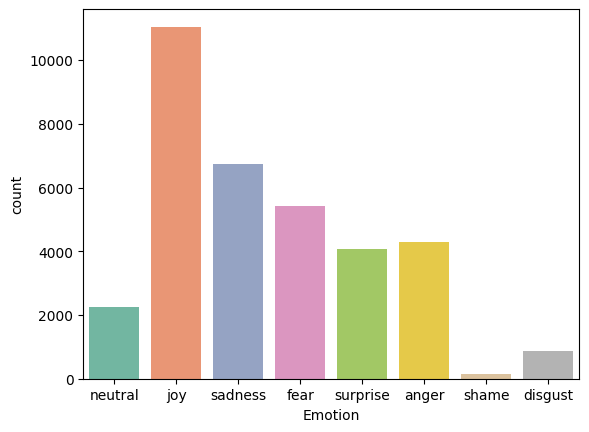

In [8]:
# Plot the counts
sns.countplot(x='Emotion',data=df,palette='Set2')

In [9]:
# Feature preparation 
# Data cleaning 
dir(nfx)          # this show already implemented data cleaning methods for a text

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# Clean dataset by removing user handles 
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [11]:
# Removing stop words 
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
# Removing special charactors 
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [15]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


# Feature engineering

In [16]:
# Features and labels 
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [17]:
# Split data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size = 0.3,random_state = 42)

In [18]:
# Build the model and pipeline
from sklearn.pipeline import Pipeline


In [20]:
# Logistic regression pipeline
pipe_lr = Pipeline(steps = [('cv',CountVectorizer()),('lr',LogisticRegression())])

In [21]:
# Train and fit data
pipe_lr.fit(x_train,y_train)

C:\Users\geyum\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
# Check accuaracy
pipe_lr.score(x_test,y_test)

0.6215750143705691

In [23]:
# Make a prediction
ex1 = "This book was so interesting it made me happy"

In [24]:
pipe_lr.predict ([ex1])

array(['joy'], dtype=object)

In [25]:
# Prediction Probability
pipe_lr.predict_proba([ex1])

array([[1.75760658e-03, 1.12962413e-02, 1.27202472e-02, 9.36312837e-01,
        1.16102658e-05, 2.30326456e-02, 6.65411252e-05, 1.48022705e-02]])

In [26]:
# To know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [27]:
# Save the model and the pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_17_june_2024.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()